In [214]:
import yfinance as yf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.optimize as sci_opt

pd.set_option('display.max_colwidth', None)  
pd.set_option('display.expand_frame_repr', False)  
df_close = pd.read_csv("HISTORICAL PRICES - Sheet1-2.csv")

df_close['Date'] = pd.to_datetime(df_close['Date'])
df_close.set_index('Date', inplace=True)


columns_to_exclude = ['SBI', 'HDFL', 'HALC', 'PGRD']
filtered_columns = [col for col in df_close.columns if col not in columns_to_exclude]


for column in filtered_columns:
    df_close[column] = df_close[column].str.replace(',', '', regex=True)
    df_close[column] = df_close[column].str.replace('%', '', regex=True)
    df_close[column] = pd.to_numeric(df_close[column], errors='coerce').fillna(0)

df_close = df_close.sort_index(ascending=True)

/var/folders/__/nfc53gb10nj0kwxgcx8h1qn00000gn/T/ipykernel_44971/2359437749.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_close['Date'] = pd.to_datetime(df_close['Date'])


In [215]:
df_close

CUMM     INFY      TCS     HDBK     ICBK     KTKM     LART     SBI      HLL    HDFL    HALC     TVSM     LTEH    PGRD     THMX     KAJR      ABB
Date                                                                                                                                                           
2019-11-29   542.25   696.35  2053.25  1274.95   512.60  1615.20  1330.55  338.50  2035.30  571.50  200.15   477.25  1490.75  106.10  1026.70   536.05  1447.80
2019-12-02   539.70   692.70  2021.05  1265.75   510.90  1633.00  1333.35  336.25  2043.20  569.40  200.80   467.75  1471.95  104.99  1008.10   522.05  1479.40
2019-12-03   532.75   698.35  2051.00  1255.40   509.35  1646.75  1313.20  341.85  2028.45  584.75  196.00   455.35  1463.45  104.44   999.90   513.40  1460.70
2019-12-04   537.65   708.85  2078.50  1251.65   529.25  1651.25  1285.10  336.20  2048.00  583.65  201.10   451.55  1482.50  103.83   982.35   515.15  1449.70
2019-12-05   539.35   714.85  2121.30  1245.60   528.10  1649.30  1302.20  320.00  2037.45  575.90  198.55   452.20  1488.20  103.44   991.15   516.60  1440.15
...             ...      ...      ...      ...      ...      ...      ...     ...      ...     ...     ...      ...      ...     ...      ...      ...      ...
2024-11-25  3535.85  1889.70  4315.10  1785.60  1300.95  1790.75  3753.00  844.45  2471.45  684.80  659.85  2458.35  5458.15  342.75  4448.55  1227.60  7259.85
2024-11-26  3463.20  1924.15  4352.70  1785.55  1304.95  1783.60  3702.60  839.40  2479.20  682.40  666.10  2424.60  5489.70  338.80  4633.95  1222.50  7329.70
2024-11-27  3500.70  1924.50  4332.55  1812.30  1300.70  1783.20  3698.70  834.10  2486.90  680.55  661.10  2440.65  5431.20  339.25  4611.35  1224.90  7496.20
2024-11-28  3481.25  1856.65  4244.90  1793.15  1286.35  1759.20  3666.05  838.85  2462.20  657.70  650.25  2415.45  5249.65  333.65  4575.00  1209.05  7394.85
2024-11-29  3483.70  1857.85  4270.85  1796.05  1300.10  1765.25  3724.80  838.95  2496.15  657.75  656.20  2434.45  5285.20  329.40  4590.10  1206.90  7421.25

[1243 rows x 17 columns]

In [216]:
sorted_esg = esg_data.sort_values(by='ESG_Score', ascending=False)
sorted_esg

Company  ESG_Score
5     KTKM       80.6
3     HDBK       80.2
1     INFY       77.2
9     HDFL       76.9
4     ICBK       75.8
12    LTEH       74.8
11    TVSM       72.6
2      TCS       72.6
8      HLL       72.0
6     LART       71.7
16     ABB       70.6
0     CUMM       69.8
7      SBI       68.4
14    THMX       67.1
15    KAJR       66.0
10    HALC       62.6
13    PGRD       61.3

In [217]:
#for the sustainability of ESG Principles(More Emphasis Given) and Diversification of Portfolio following are the stocks selected from different sectors 
#Stocks KTKM HDBK INFY HDFL TVSM....(Stocks with more ESG score taken )
#Monte Carlo Method

stocks= np.array(['KTKM','HDBK','INFY','TVSM','ABB'])

num_stocks=len(stocks)

df_close=df_close[stocks]

# calculate log returns
log_returns=np.log(1+df_close.pct_change())
log_returns=log_returns.dropna()

# generating random weights
random_weights=np.array(np.random.random(num_stocks))
random_weights=random_weights/np.sum(random_weights)

#expected annualised return
exp_return=np.sum((log_returns.mean()*random_weights)*252)

#expected volatility
exp_volatility=np.sqrt(
    np.dot(random_weights.T,
           np.dot( log_returns.cov()*252,random_weights  
       )
    )
)

#calculating sharpe ratio, making clear that for australian stock market the risk free rate is arround 4%
risk_free_rate=0.04

sharpe_ratio= (exp_return-risk_free_rate)/exp_volatility

# for multiple iteration MONTE CARLO SIMULATION
num_iterations=10000

# preparing empty dataframe for storing results for multiple iterations
#for weights
weights_array=np.zeros((num_iterations,num_stocks))

# for returns
ret_array=np.zeros(num_iterations)

#for volatility
vol_array=np.zeros(num_iterations)

#for sharpe ratio
sharpe_array=np.zeros(num_iterations)

#simulation

for i in range(num_iterations):
    #weights
    weights=np.array(np.random.random(num_stocks))
    weights=weights/np.sum(weights)
    weights_array[i,:]=weights
    #returns
    exp_return=np.sum((log_returns.mean()*weights)*252)
    ret_array[i]=exp_return
    #volatilty
    exp_volatility=np.sqrt(
        np.dot(
            weights.T,np.dot(
                log_returns.cov()*252,weights
            )
        )
    )
    vol_array[i]=exp_volatility
    #sharpe ratio
    sharpe_ratio=(exp_return-risk_free_rate)/ exp_volatility
    sharpe_array[i]=sharpe_ratio

# combining all 
data=[ret_array,vol_array,sharpe_array,weights_array]
simulations_df=pd.DataFrame(data=data).T
simulations_df.columns=['Returns','Volatility','Sharpe Ratio','Weights']

#deciding metrics
#maximising sharpe ratio
max_sharpe=simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

#minimising volatilty
min_vol=simulations_df.loc[simulations_df['Volatility'].idxmin()]

# maximising return
max_return=simulations_df.loc[simulations_df['Returns'].idxmax()]

print('MAX SHARPE RATIO')
print('-'*80)
print(max_sharpe)


print('='*100)
print('MIN VOLATILITY')
print('-'*80)
print(min_vol)

print('='*100)
print('MAX RETURN')
print('-'*80)
print(max_return)



MAX SHARPE RATIO
--------------------------------------------------------------------------------
Returns                                                                                                            0.290836
Volatility                                                                                                          0.21494
Sharpe Ratio                                                                                                       1.167009
Weights         [0.005652000905386376, 0.005821733100866398, 0.27984944286979646, 0.39134235220917124, 0.31733447091477957]
Name: 7450, dtype: object
MIN VOLATILITY
--------------------------------------------------------------------------------
Returns                                                                                                         0.205885
Volatility                                                                                                      0.195186
Sharpe Ratio                              

Text(0, 0.5, 'Returns')

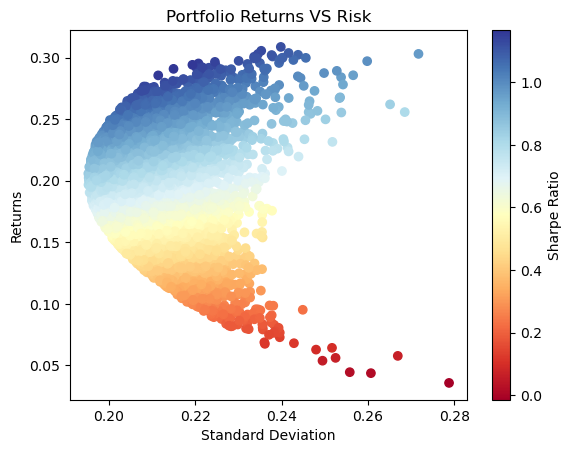

In [218]:
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

plt.title('Portfolio Returns VS Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

In [219]:
# Using Scipy Optimization

def get_metrics(weights:list)-> np.array:
    weights= np.array(weights)
    ret= np.sum((log_returns.mean()*weights)*252)
    vol= np.sqrt(
        np.dot(
            weights.T,np.dot(log_returns.cov()*252,weights)
        )
    )
    sr= (ret-risk_free_rate)/vol
    return np.array([ret,vol,sr])

def neg_sharpe(weights:list)-> np.array:
    return get_metrics(weights)[2]-1

def vol(weights:list)-> np.array:
    return get_metrics(weights)[1]

def check_sum(weights:list)->float:
    return np.sum(weights)-1

In [220]:
bounds=tuple((0,1) for stocks in range(num_stocks))

constraints=({'type':'eq','fun':check_sum})

initial_guess=num_stocks*[1/num_stocks]

optimized_sharpe=sci_opt.minimize(
    neg_sharpe, #element to minimize
    initial_guess, # initial weights 
    method='SLSQP',
    bounds=bounds,
    constraints=constraints   
)

print('OPTIMIZED SHARPE')
print('-'*80)
print(optimized_sharpe)

print('='*100)




OPTIMIZED SHARPE
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0745493219455953
       x: [ 1.000e+00  7.216e-16  0.000e+00  0.000e+00  0.000e+00]
     nit: 4
     jac: [ 1.357e-01  2.786e-01  6.984e-01  1.147e+00  1.143e+00]
    nfev: 24
    njev: 4


In [221]:
optimized_metrics=get_metrics(weights=optimized_sharpe.x)

print('OPTIMIZED METRICS')
print('-'*80)
print(optimized_metrics)

print('='*100)


OPTIMIZED METRICS
--------------------------------------------------------------------------------
[ 0.0180242   0.29478208 -0.07454932]


In [222]:
optimized_vol=sci_opt.minimize(
    vol, #element to minimize
    initial_guess, # initial weights 
    method='SLSQP',
    bounds=bounds,
    constraints=constraints   
)

print('OPTIMIZED VOLATILITY')
print('-'*80)
print(optimized_vol)

print('='*100)


OPTIMIZED VOLATILITY
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.1951112964725294
       x: [ 1.307e-01  1.768e-01  3.109e-01  1.837e-01  1.980e-01]
     nit: 5
     jac: [ 1.954e-01  1.946e-01  1.950e-01  1.953e-01  1.953e-01]
    nfev: 30
    njev: 5


In [223]:
optimized_metrics_1=get_metrics(weights=optimized_vol.x)

print('OPTIMIZED METRICS')
print('-'*80)
print(optimized_metrics_1)

print('='*100)


OPTIMIZED METRICS
--------------------------------------------------------------------------------
[0.20292152 0.1951113  0.83501838]


In [224]:
#for metrics as voltality 
print('WEIGHTS')
print('-'*80)
print(optimized_vol.x)

print('='*100)

print('RETURNS')
print('-'*80)
print(optimized_metrics_1[0])

print('='*100)

print('VOLATILITY')
print('-'*80)
print(optimized_metrics_1[1])

print('='*100)

print('SHARPE RATIO')
print('-'*80)
print(optimized_metrics_1[2])

print('='*100)

WEIGHTS
--------------------------------------------------------------------------------
[0.1306871  0.17677572 0.31087565 0.18367491 0.19798662]
RETURNS
--------------------------------------------------------------------------------
0.20292151943642284
VOLATILITY
--------------------------------------------------------------------------------
0.1951112964725294
SHARPE RATIO
--------------------------------------------------------------------------------
0.8350183837733931


In [225]:
#for metrics as sharpe ratio
print('WEIGHTS')
print('-'*80)
print(optimized_sharpe.x)

print('='*100)

print('RETURNS')
print('-'*80)
print(optimized_metrics[0])

print('='*100)

print('VOLATILITY')
print('-'*80)
print(optimized_metrics[1])

print('='*100)

print('SHARPE RATIO')
print('-'*80)
print(optimized_metrics[2])

print('='*100)

WEIGHTS
--------------------------------------------------------------------------------
[1.00000000e+00 7.21644966e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
RETURNS
--------------------------------------------------------------------------------
0.01802419558796492
VOLATILITY
--------------------------------------------------------------------------------
0.29478208303588094
SHARPE RATIO
--------------------------------------------------------------------------------
-0.07454932194559526
